In [1]:
"""
Given a list of states, render the environment
"""
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
import matplotlib as mpl
import matplotlib.patches as patches
from IPython.display import HTML

class Visualizer():
    def __init__(self, params):
        self.params = params
        self.dt = 0.05
    def _init(self):
        pass
    def _animate(self, i):
        pass
    def animate(self, states, obstacles):
        '''
        given a list of states and obstacles, animate the robot
        '''
        pass


In [2]:
class CartPoleVisualizer(Visualizer):
    def __init__(self, params):
        super(CartPoleVisualizer, self).__init__(params)
        self.dt = 0.05

    def _init(self):
        # clear the current ax
        ax = plt.gca()
        ax.clear()
        # add patches
        state = self.states[0]
        self.pole = patches.Rectangle((state[0]-self.params['pole_w']/2,self.params['cart_h']),\
                                       self.params['pole_w'],self.params['pole_l'],\
                                      linewidth=.5,edgecolor='red',facecolor='red')
        self.cart = patches.Rectangle((state[0]-self.params['cart_w']/2,0),\
                                       self.params['cart_w'],self.params['cart_h'],\
                                      linewidth=.5,edgecolor='blue',facecolor='blue')
        self.recs = []
        self.recs.append(self.pole)
        self.recs.append(self.cart)
        for i in range(len(self.obs)):
            x, y = self.obs[i]
            obs = patches.Rectangle((x-self.params['obs_w']/2,y-params['obs_h']/2),\
                                       self.params['obs_w'],self.params['obs_h'],\
                                      linewidth=.5,edgecolor='black',facecolor='black')
            self.recs.append(obs)
            ax.add_patch(obs)
        # transform pole according to state
        t = mpl.transforms.Affine2D().rotate_deg_around(state[0], self.params['cart_h'], \
                                                        state[2]/np.pi * 180) + ax.transData
        self.pole.set_transform(t)
        ax.add_patch(self.pole)
        ax.add_patch(self.cart)
        return self.recs
    def _animate(self, i):
        ax = plt.gca()
        ax.set_xlim(-40, 40)
        ax.set_ylim(-20, 20)
        state = self.states[i]
        self.pole.set_xy((state[0]-self.params['pole_w']/2,self.params['cart_h']))
        t = mpl.transforms.Affine2D().rotate_deg_around(state[0], self.params['cart_h'], \
                                                        state[2]/np.pi * 180) + ax.transData
        self.pole.set_transform(t)
        self.cart.set_xy((state[0]-self.params['cart_w']/2,params['cart_h']))
        return self.recs
    def animate(self, states, obstacles):
        '''
        given a list of states and obstacles, animate the robot
        '''
        self.states = states
        self.obs = obstacles
        ani = animation.FuncAnimation(plt.gcf(), self._animate, range(1, len(self.states)),
                                      interval=self.dt*1000, blit=True, init_func=self._init)
        HTML(ani.to_html5_video())        
        


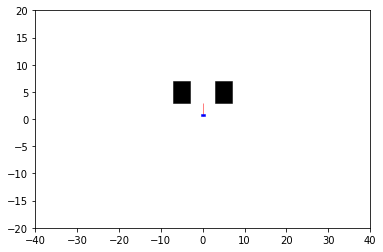

In [3]:
params = {}
params['pole_l'] = 2.5
params['pole_w'] = 0.1
params['cart_w'] = 1.
params['cart_h'] = 0.5
params['obs_w'] = 4
params['obs_h'] = 4
vis = CartPoleVisualizer(params)
states = np.zeros((100,4))
#states[:,2] = 0.
obs = np.array([[5,5],[-5,5]])

fig = plt.figure()
vis.animate(states, obs)